In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from config import weather_api_key
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | the valley
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | wanaka
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | weyburn
Processing Record 7 of Set 1 | suntar
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | malur
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | tautira
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | maraba
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | san felipe
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | san rafael
Processing Record 23 of Set 1 

Processing Record 39 of Set 4 | tsienyane
City not found. Skipping...
Processing Record 40 of Set 4 | zamora
Processing Record 41 of Set 4 | sabang
Processing Record 42 of Set 4 | kidal
Processing Record 43 of Set 4 | harindanga
Processing Record 44 of Set 4 | cockburn harbour
City not found. Skipping...
Processing Record 45 of Set 4 | hofn
Processing Record 46 of Set 4 | charters towers
Processing Record 47 of Set 4 | fortuna
Processing Record 48 of Set 4 | hirara
Processing Record 49 of Set 4 | zapolyarnyy
Processing Record 50 of Set 4 | ketchikan
Processing Record 1 of Set 5 | bambous virieux
Processing Record 2 of Set 5 | steamboat springs
Processing Record 3 of Set 5 | borama
City not found. Skipping...
Processing Record 4 of Set 5 | jalu
Processing Record 5 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 6 of Set 5 | najran
Processing Record 7 of Set 5 | boende
Processing Record 8 of Set 5 | shingu
Processing Record 9 of Set 5 | kununurra
Processing Record 10 of

City not found. Skipping...
Processing Record 29 of Set 8 | svetlaya
Processing Record 30 of Set 8 | ilulissat
Processing Record 31 of Set 8 | tignere
Processing Record 32 of Set 8 | eyl
Processing Record 33 of Set 8 | leningradskiy
Processing Record 34 of Set 8 | mattru
Processing Record 35 of Set 8 | bac lieu
Processing Record 36 of Set 8 | halalo
City not found. Skipping...
Processing Record 37 of Set 8 | tahta
Processing Record 38 of Set 8 | dombasle-sur-meurthe
Processing Record 39 of Set 8 | dok kham tai
Processing Record 40 of Set 8 | nampula
Processing Record 41 of Set 8 | belyy yar
Processing Record 42 of Set 8 | bathsheba
Processing Record 43 of Set 8 | sioux lookout
Processing Record 44 of Set 8 | nokia
Processing Record 45 of Set 8 | rio tercero
Processing Record 46 of Set 8 | grande-riviere
City not found. Skipping...
Processing Record 47 of Set 8 | caravelas
Processing Record 48 of Set 8 | udachnyy
Processing Record 49 of Set 8 | bur gabo
City not found. Skipping...
Proce

City not found. Skipping...
Processing Record 14 of Set 12 | zhangjiakou
Processing Record 15 of Set 12 | ganzhou
Processing Record 16 of Set 12 | korla
Processing Record 17 of Set 12 | lahaina
Processing Record 18 of Set 12 | peniche
Processing Record 19 of Set 12 | san gabriel
Processing Record 20 of Set 12 | mount isa
Processing Record 21 of Set 12 | leshan
Processing Record 22 of Set 12 | slave lake
Processing Record 23 of Set 12 | maridi
Processing Record 24 of Set 12 | mandla
Processing Record 25 of Set 12 | hosakote
Processing Record 26 of Set 12 | constitucion
Processing Record 27 of Set 12 | yashkul
Processing Record 28 of Set 12 | ixtapa
Processing Record 29 of Set 12 | nautla
Processing Record 30 of Set 12 | slonim
Processing Record 31 of Set 12 | kurilsk
Processing Record 32 of Set 12 | hervey bay
Processing Record 33 of Set 12 | newton
Processing Record 34 of Set 12 | balikpapan
Processing Record 35 of Set 12 | alakurtti
Processing Record 36 of Set 12 | praia da vitoria
Pr

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,The Valley,18.22,-63.06,80.60,74,40,9.17,AI,2020-04-16 23:48:05
1,Punta Arenas,-53.15,-70.92,50.00,87,75,9.17,CL,2020-04-16 23:50:48
2,Wanaka,-44.70,169.15,54.10,63,92,4.54,NZ,2020-04-16 23:50:48
3,New Norfolk,-42.78,147.06,51.80,53,75,21.92,AU,2020-04-16 23:50:19
4,Rikitea,-23.12,-134.97,76.37,75,24,12.77,PF,2020-04-16 23:50:50
5,Weyburn,49.67,-103.85,37.00,52,97,10.00,CA,2020-04-16 23:50:51
6,Suntar,62.14,117.63,17.11,88,85,4.81,RU,2020-04-16 23:50:51
7,Ancud,-41.87,-73.82,59.00,100,90,17.22,CL,2020-04-16 23:50:51
8,Vaini,-21.20,-175.20,80.60,74,75,4.70,TO,2020-04-16 23:50:14
9,Malur,13.01,77.94,69.80,64,20,2.24,IN,2020-04-16 23:50:52


In [9]:
# Reorder columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,The Valley,AI,2020-04-16 23:48:05,18.22,-63.06,80.60,74,40,9.17
1,Punta Arenas,CL,2020-04-16 23:50:48,-53.15,-70.92,50.00,87,75,9.17
2,Wanaka,NZ,2020-04-16 23:50:48,-44.70,169.15,54.10,63,92,4.54
3,New Norfolk,AU,2020-04-16 23:50:19,-42.78,147.06,51.80,53,75,21.92
4,Rikitea,PF,2020-04-16 23:50:50,-23.12,-134.97,76.37,75,24,12.77


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

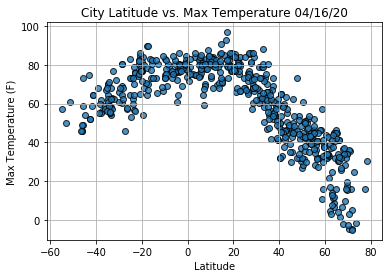

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

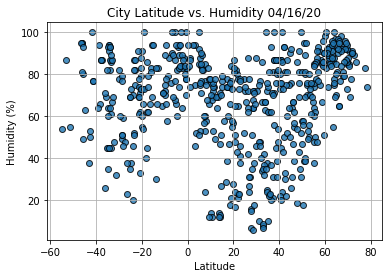

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

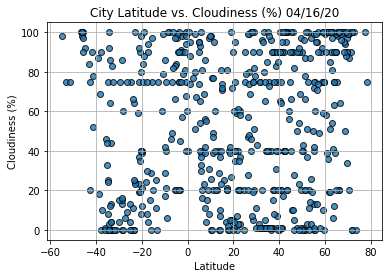

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

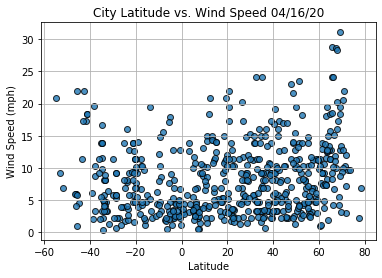

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                       Maraba
Country                        BR
Date          2020-04-16 23:49:12
Lat                         -5.37
Lng                        -49.12
Max Temp                     80.6
Humidity                      100
Cloudiness                     20
Wind Speed                   3.36
Name: 13, dtype: object

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

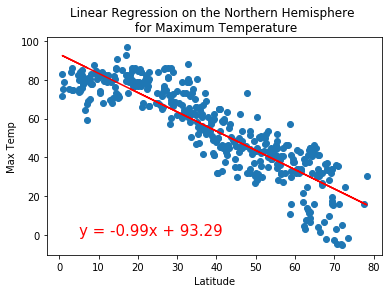

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(5,0))

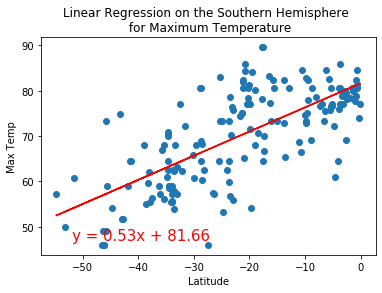

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-52,47))

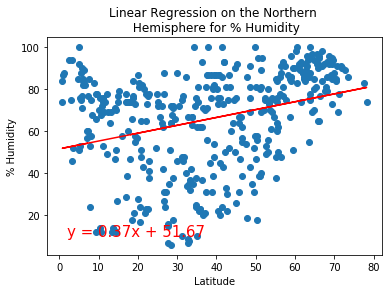

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern \n Hemisphere for % Humidity', '% Humidity',(2,10))

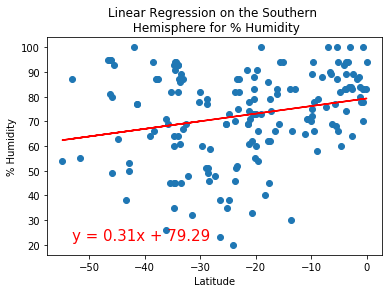

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern \n Hemisphere for % Humidity', '% Humidity',(-53,22))

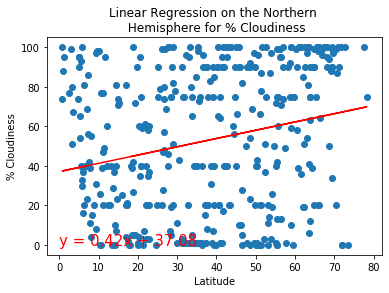

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern \n Hemisphere for % Cloudiness', '% Cloudiness',(0,0))

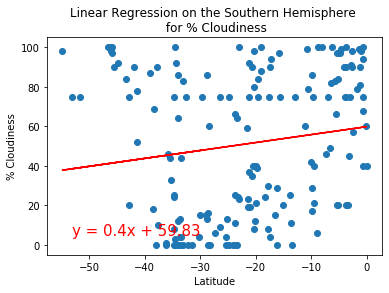

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-53,5))

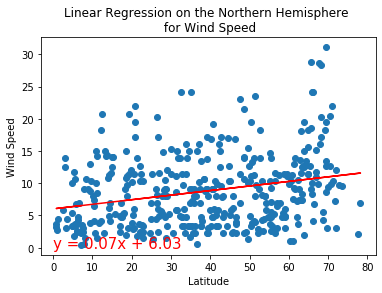

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,0))

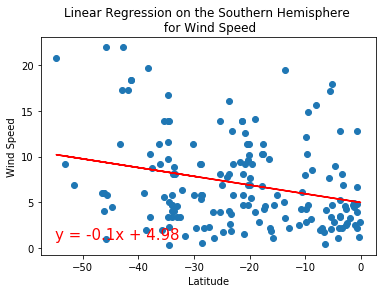

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,1))